# Regression

Regression modeling is any attempt to predict or explain a continous variable from a collection of input data. This could be student GPA, the position of a planet orbiting a sun, or the color of a pixel in a photo. Values such as whether a student is a STEM student or not, the probability of an event occuring (such as changing a major, an earthquake) are not regression tasks (they are classification).

After completing this tutorial you should be able to:

* use `sci-kit learn` to split data into training and testing sets
* understand the model, fit, score paradigm in `sci-kit learn` and apply it to a problem
* understand the most important visualizations of regression analysis: actual vs. predicted, actual vs. residuals, residuals distribution vs. assumed theoretical distribution (in case of OLS models)
* have a conceptual understanding of the basic goal of any regression task
* have some understanding that most statistical "tests" are typically just specific solutions of a linear regression problem
* have some understanding of the assumptions of linear models

## Further reading

1. Hands on machine learning, probably the best practical machine learning textbook ever written https://github.com/ageron/handson-ml
2. Common statistical tests are linear models, stop thinking statistics are something other than y=mx+b, they are not. lol. https://lindeloev.github.io/tests-as-linear/?fbclid=IwAR09Rp4Vv18fOO4lg0ITnCYJICCC1iuzeq-tNYPWsnmK6CrGgdErpvHfyWE
3. 

## Data

In the data folder you should have some data. Import the data like you did in the previous tutorial "exploring data". The first step in any regression task is to explore the data the raw data.

### DATA TODO 

1. Visualize the data in three different ways
2. Which variables may covary? How will this effect your model?

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression

In [2]:
# df = pd.read_pickle('data/regression_data.pkl')
df = pd.read_csv('data/regression_data.csv')

In [3]:
df.head()

,cGPA,attendance,passed_percent,sex,hsGPA,ethnicity,fci_post
0,2.083621,51.137226,48.929495,1.0,2.642089,2.0,14.618734
1,2.043927,47.819398,31.298644,1.0,1.872415,2.0,10.652295
2,2.147087,34.160519,32.312813,0.0,2.068908,2.0,7.546426
3,2.286152,55.850494,43.496181,0.0,2.058815,2.0,14.041647
4,2.519186,77.501019,39.407797,0.0,1.932764,2.0,15.960932


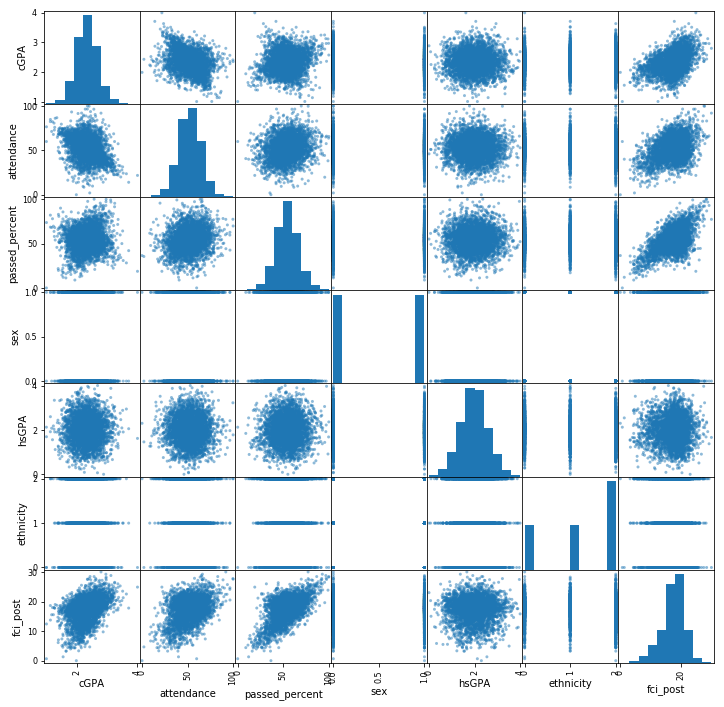

In [4]:
axes = pd.plotting.scatter_matrix(df, figsize=(12, 12))

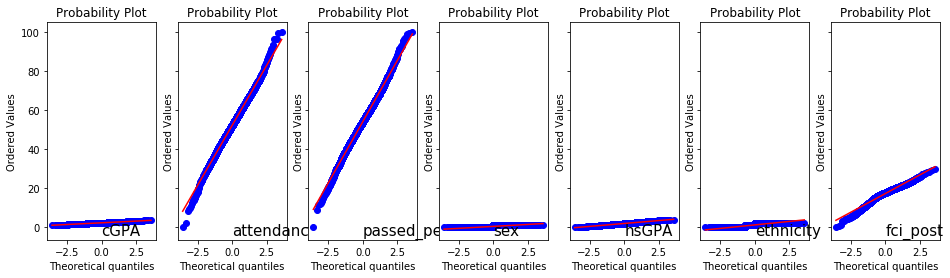

In [5]:
cols = df.columns
fig, axs= plt.subplots(1, len(cols), figsize=(16, 4), sharey=True)
for c, ax in zip(cols, axs):
    stats.probplot(df[c].values, plot=ax)
    ax.text(s=c, x=0, y=-4, fontsize=15)

## Modeling

Modeling data is as much an art as it is science. There is no "true" model, there is only a model that reduces error to an acceptable amount. Most models attempt to do this automatically by minimizing some sort of cost function (or error) using some kind of solver algorithm. These solving methods are beyond the scope of this workshop but are important to know they exist and somewhat how they work. If you are interested in this sort of thing I recommend starting with [this stats exchange thread](https://stats.stackexchange.com/questions/160179/do-we-need-gradient-descent-to-find-the-coefficients-of-a-linear-regression-mode) and googling each solver in the answer that seems interesting. This is only for Linear Least Squares models but its a good place to start. Moving on...

### MODELING TODO
1. split the data into training and testing data sets using the `sklearn.model_selection` method `train_test_split` [[link]](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
2. create an OLS model using the `sklearn.linear_model` function `LinearRegression` [[link]](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression)
3. score the model using your model's built in `score` method. What does this number represent? What is it summarizing?

In [6]:
df.columns

Index(['cGPA', 'attendance', 'passed_percent', 'sex', 'hsGPA', 'ethnicity',
       'fci_post'],
      dtype='object')

In [7]:
train_x, test_x, train_y, test_y = train_test_split(df[df.columns[:-1]], df[df.columns[-1]])

In [8]:
LR = LinearRegression()
LR.fit(train_x, train_y)
LR.score(test_x, test_y)

0.6623464134356283

## Analysing the model output

Now that we have established the goal of the model is to minimize the error, created a model, and found some brilliant amazing score for the model, we still must recognize that the model has some error. The error/residual is really just the linear distance from the model "plane" to the predicted value as shown below:

<img src="https://internal.ncl.ac.uk/ask/numeracy-maths-statistics/images/Residuals.png" />

These residuals are data in their own right. But instead of being data about students, courses, etc. they are data about the model and how it is giving predictions. Thus we can use it to describe the model performance.

### ANALYSING TODO
 
1. Create predicted data using the model's `predict` method. Now make a scatter plot to compare it to the actual values and draw a diagonal through this plot. What "shape" does the scatter plot "blob" look like? Does the "blob" follow the diagonal line or does it deviate in some way?
2. Write a function to calculate the residuals of the model. Plot the actual values versus the residuals using a scatter plot.

In [9]:
predicted = LR.predict(test_x)

Text(0.5, 0, 'Actual')

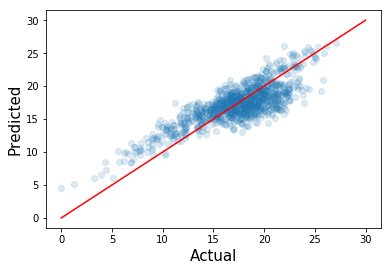

In [10]:
fig, ax = plt.subplots()

ax.scatter(x=test_y, y=predicted, alpha=0.15)
ax.plot([-0, 30], [-0, 30], color='red')
ax.set_ylabel('Predicted', fontsize=15)
ax.set_xlabel('Actual', fontsize=15)

Text(0.5, 0, 'Actual')

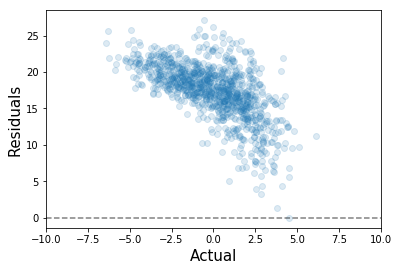

In [11]:
def calculate_residuals(actual, predicted):
    return predicted - actual

residuals = calculate_residuals(actual=test_y, predicted=predicted)

fig, ax = plt.subplots()

ax.scatter(x=residuals, y=test_y, alpha=0.15)
ax.plot([-10, 10], [0, 0], color='black', linestyle='--', alpha=0.5)
ax.set_xlim(-10, 10)

ax.set_ylabel('Residuals', fontsize=15)
ax.set_xlabel('Actual', fontsize=15)

## Model Features - training and fitting

All models have some input data X and some output prediction Y. The input data X is of the shape $m \times n$, so that means there are $m$ columns (or features) and $n$ data "points" (or vectors if $m>1$). For many models, you can return values from the model that give some indication as to how "important" each particular feature is to the model's training. Typically, the larger the magnitude of this value, the more important the feature is for prediction. This value for linear models is called the model *coefficients*. It may also be called *feature importance*. These values are always calculated from the data that was used to train (fit) the model. Thus, they don't really tell us about how important the features are for new data, rather how important the features were in deciding the "shape" of the model itself.

### TRAINING AND FITTING TODO

1. make a bar graph of all the features in the model. Which is the most important feature for fitting? Which is least important?
2. Often times linear model coefficients have [confidence intervals](https://en.wikipedia.org/wiki/Confidence_interval). Can you describe a way you might generate this interval for each coefficient?

In [12]:
model_coefficients = LR.coef_
coefs_df = pd.DataFrame(model_coefficients, index=df.columns[0:-1], columns=['coef',])
coefs_df

,coef
cGPA,6.460626
attendance,0.159747
passed_percent,0.124324
sex,-0.020244
hsGPA,0.005015
ethnicity,-0.009199


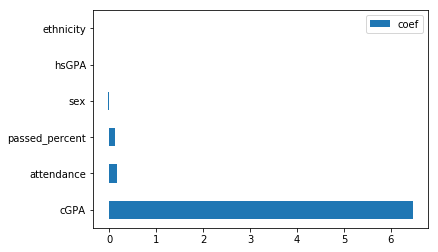

In [13]:
coefs_df.plot.barh()

In [14]:
def get_bootstrapped_coefs():
    coefs = []
    for run in np.arange(100):
        train_x, test_x, train_y, test_y = train_test_split(df[df.columns[:-1]], df[df.columns[-1]])
        LR = LinearRegression()
        LR.fit(train_x, train_y)
        coefs.append(LR.coef_)
    return np.array(coefs)

boot_coefs = get_bootstrapped_coefs()
boot_coefs[0:5]

array([[ 6.43834032,  0.16201466,  0.12776921, -0.04126993,  0.05496519,
        -0.03749373],
       [ 6.51932741,  0.16025926,  0.1265212 , -0.02250557,  0.00758943,
         0.01432276],
       [ 6.46648945,  0.15941866,  0.12784853, -0.08179043, -0.03699177,
        -0.02123931],
       [ 6.46770757,  0.16202001,  0.12804413, -0.01626235,  0.06340536,
        -0.03444963],
       [ 6.49419245,  0.16054985,  0.12605367, -0.07562103, -0.0264425 ,
        -0.06721886]])

'\nIn this case the standard error is really low so i used 3*STDEV (99% of the data is within these error bars) instead\n'

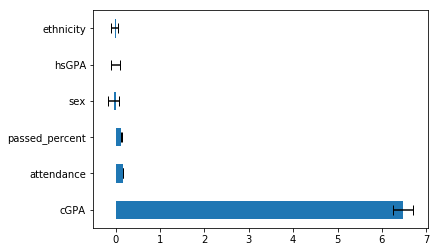

In [15]:
boot_coef_df = pd.DataFrame(boot_coefs, columns=df.columns[:-1])
avg = boot_coef_df.mean()
sem = boot_coef_df.std() * 3

avg.plot.barh(xerr=sem, capsize=5)

"""
In this case the standard error is really low so i used 3*STDEV (99% of the data is within these error bars) instead
"""

## Model Features - predicting

The correlary to each feature's coefficient or importance value, is the amount of variance that feature explains in the prediction. Remember, we have split the data into two separate sets, the training data and the testing data. The test data is never shown to the model until after the model is "fit" to the training data. This secrecy is why we are able to test the predictive power of each model. This secret or "hold out" data can be used to measure the "explained variance" of each coefficient/feature. One method of doing this is called [recursive feature elimination](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html). Essentially, the coefficient of the model are ordered by magnitude, and the smallest are then removed one at a time until only one feature is left. Each iteration the model's `score` function is called. This provides a ranking based on the predictive power of the features.

### PREDICTING TODO

1. Using the `RFE` function, calculate the explained variance of each of the features in your model.
2. Plot the scores returned for each of the combination of features from largest contributions to smallest as a line plot.

In [16]:
rfe = RFECV(estimator=LinearRegression(), )
rfe.fit(train_x, train_y)

/home/john/anaconda3/envs/research/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


RFECV(cv='warn',
      estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                 normalize=False),
      min_features_to_select=1, n_jobs=None, scoring=None, step=1, verbose=0)

In [17]:
rfe.grid_scores_

array([0.19042854, 0.52038274, 0.67107087, 0.67051811, 0.67025914,
       0.67021928])

In [18]:
rfe.ranking_

array([1, 1, 1, 2, 4, 3])

Text(0, 0.5, 'R-squared')

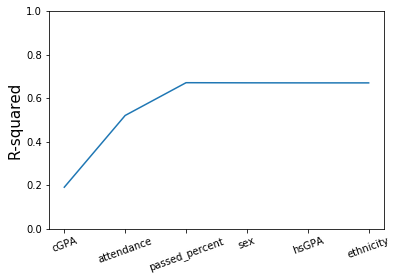

In [19]:
fig, ax = plt.subplots()

ax.plot(rfe.grid_scores_)
ax.set_ylim(0, 1)

ax.set_xticks(np.arange(len(df.columns[:-1])))
ax.set_xticklabels(df.columns[:-1], rotation=20)
ax.set_ylabel('R-squared', fontsize=15)

## WRAP UP

A lot of what you have learned here is very relevant to all machine learning tasks whether its classification, text analysis, or something more esoteric. Splitting data and training different models and comparing the outputs is the bread and butter of any data scientists tool box. Great job!

## CHALLENGE

1. Can you think of a model that ISNT a "linear model" that could be used to perform a regression? Find the `sklearn` implementation and apply it to this data.
2. Is your new model better or worse than the model you already built? How are the residuals different?
3. Can you think of different ways of splitting the data for training and testing the models? Why would this way be better than the way the data is split here?
4. What other ways could there be to measure the contribution to prediction than recursive feature elimination? Can you test this on your model and compare the two methods?